In [35]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt
from statsmodels.tsa.api import SimpleExpSmoothing
import matplotlib.pyplot as plt
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")


# Datos
data = {
    "Periodo": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36],
     'Visitantes': [224288, 173994, 77209, 725, 646, 1396, 1398, 1494, 2607, 18497, 31234, 37275, 25875, 29066, 43521, 30295, 35899, 61530, 71212, 72178, 73623, 90434, 107507, 143488, 136010, 120218, 144437, 144323, 136280, 146062, 154194, 150413, 144123, 160299, 167067, 191898]
    }
df = pd.DataFrame(data)

Promedio Móvil - MAD: 31504.14, MAPE: 33.73, Desviación Estándar: 39380.17, TST Sup: 2.48, TST Min: -0.33


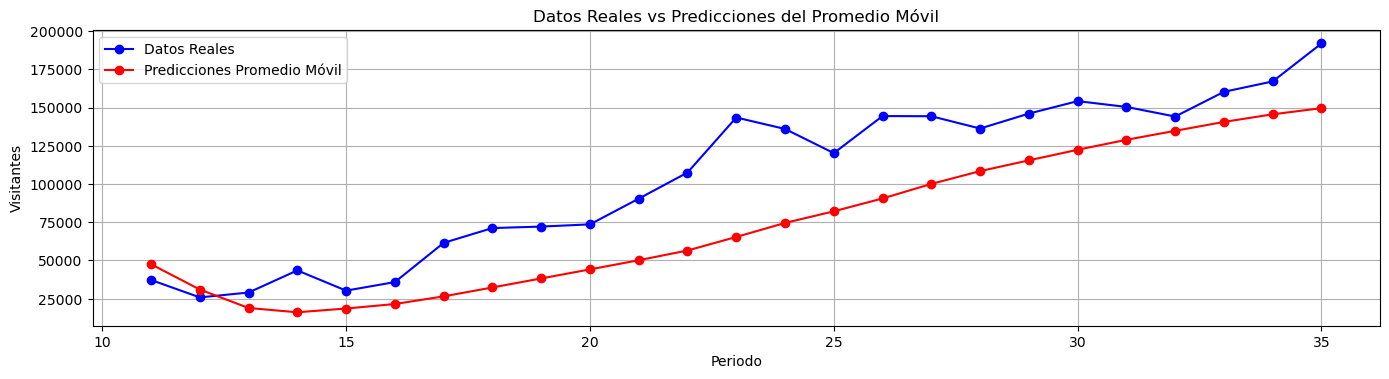

In [36]:
# Promedio Móvil (ventana de 12 periodos)
df['MA_Predictions'] = df['Visitantes'].rolling(window=12).mean()

# Eliminamos los valores NaN
df.dropna(inplace=True)

# Cálculo de los errores
MAD_ma = mean_absolute_error(df['Visitantes'], df['MA_Predictions'])
MAPE_ma = mean_absolute_percentage_error(df['Visitantes'], df['MA_Predictions'])*100
errors_ma = df['Visitantes'] - df['MA_Predictions']
range_error_ma = errors_ma.max() - errors_ma.min()
std_error_ma = 1.25*MAD_ma
df['TSt'] = errors_ma / MAD_ma
t_student_max_ma = df['TSt'].max()
t_student_min_ma = df['TSt'].min()
# Resultados
print(f"Promedio Móvil - MAD: {round(MAD_ma,2)}, MAPE: {round(MAPE_ma,2)}, Desviación Estándar: {round(std_error_ma,2)}, TST Sup: {round(t_student_max_ma,2)}, TST Min: {round(t_student_min_ma,2)}")

# Visualización
plt.figure(figsize=(14, 7))

# Gráfico de datos reales y predicciones del promedio móvil
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Visitantes'], label='Datos Reales', color='blue', marker='o')
plt.plot(df.index, df['MA_Predictions'], label='Predicciones Promedio Móvil', color='red', marker='o')
plt.title('Datos Reales vs Predicciones del Promedio Móvil')
plt.xlabel('Periodo')
plt.ylabel('Visitantes')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Suavizado Exponencial - MAD: 25516.92, MAPE: 24.95, Desviación Estándar: 31896.15, TST Sup: 2.81, TST Min: -0.45


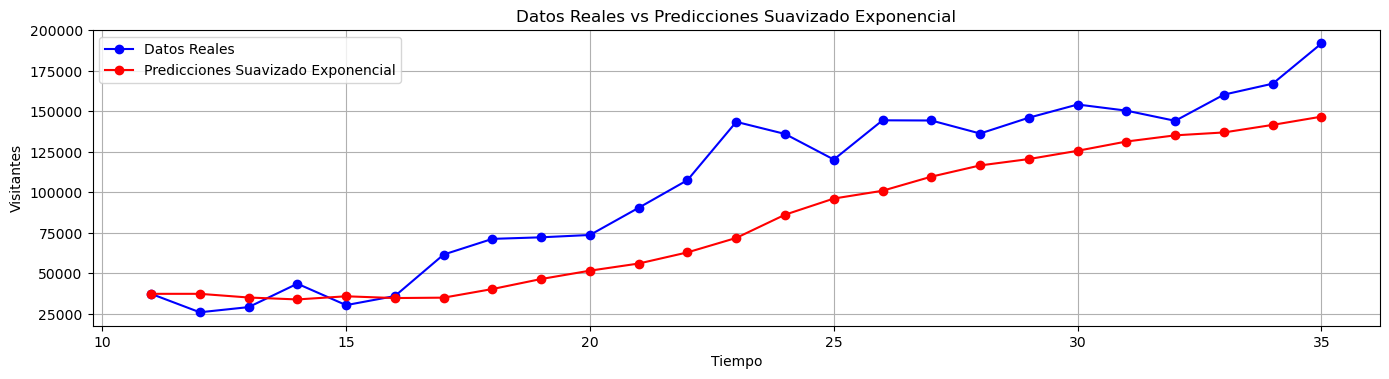

In [37]:
# Suavizado Exponencial
model_ses = SimpleExpSmoothing(df['Visitantes']).fit(smoothing_level=0.2 ,optimized=False)
predictions_ses = model_ses.fittedvalues

# Cálculo de los errores
MAD_ses = mean_absolute_error(df['Visitantes'], predictions_ses)
MAPE_ses = mean_absolute_percentage_error(df['Visitantes'], predictions_ses)*100
errors_ses = df['Visitantes'] - predictions_ses
std_error_ses = 1.25*MAD_ses
# Cálculo de t-Student
df['TSt'] = errors_ses / MAD_ses 
# Calcular el valor máximo y mínimo de t-Student
t_student_max_ses = df['TSt'].max()
t_student_min_ses = df['TSt'].min()

# Resultados
print(f"Suavizado Exponencial - MAD: {round(MAD_ses,2)}, MAPE: {round(MAPE_ses,2)}, Desviación Estándar: {round(std_error_ses,2)}, TST Sup: {round(t_student_max_ses,2)}, TST Min: {round(t_student_min_ses,2)}")

# Visualización
plt.figure(figsize=(14, 7))

# Gráfico de datos reales y predicciones del suavizado exponencial
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Visitantes'], label='Datos Reales', color='blue', marker='o')
plt.plot(df.index, predictions_ses, label='Predicciones Suavizado Exponencial', color='red', marker='o')
plt.title('Datos Reales vs Predicciones Suavizado Exponencial')
plt.xlabel('Tiempo')
plt.ylabel('Visitantes')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Holt - MAD: 12366.21, MAPE: 15.71, Desviación Estándar: 15457.76, TST Sup: 2.5, TST Min: -2.36


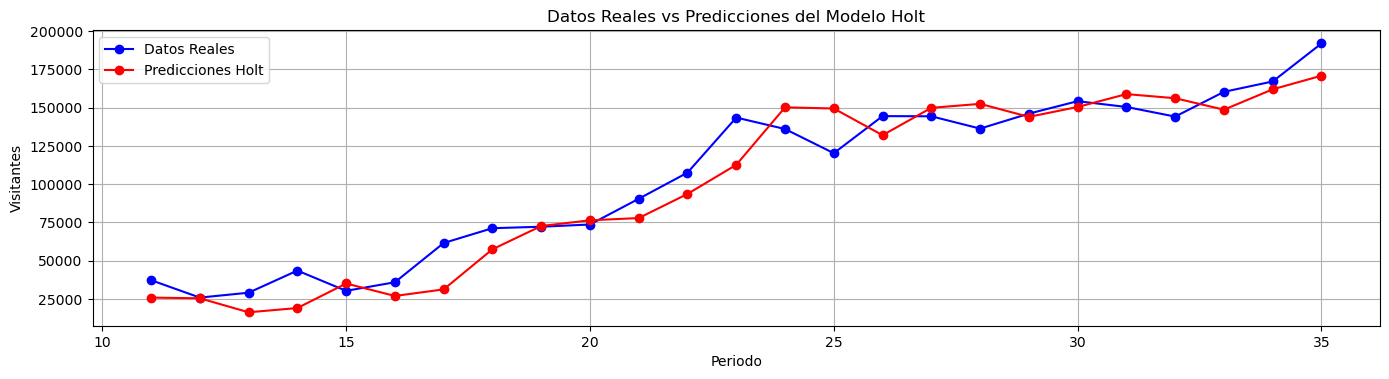

In [38]:
# Holt
model_holt = Holt(df['Visitantes']).fit(smoothing_level=0.8, smoothing_trend=0.2,optimized=False)
predictions_holt = model_holt.fittedvalues

# Cálculo de los errores
MAD_holt = mean_absolute_error(df['Visitantes'], predictions_holt)
MAPE_holt = mean_absolute_percentage_error(df['Visitantes'], predictions_holt)*100
errors_holt = df['Visitantes'] - predictions_holt
std_error_holt = 1.25*MAD_holt
# Cálculo de t-Student
df['TSt'] = errors_holt / MAD_holt 
# Calcular el valor máximo y mínimo de t-Student
t_student_max_holt = df['TSt'].max()
t_student_min_holt = df['TSt'].min()
# Resultados
print(f"Holt - MAD: {round(MAD_holt,2)}, MAPE: {round(MAPE_holt,2)}, Desviación Estándar: {round(std_error_holt,2)}, TST Sup: {round(t_student_max_holt,2)}, TST Min: {round(t_student_min_holt,2)}")

# Visualización
plt.figure(figsize=(14, 7))

# Gráfico de datos reales y predicciones del modelo Holt
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Visitantes'], label='Datos Reales', color='blue', marker='o')
plt.plot(df.index, predictions_holt, label='Predicciones Holt', color='red', marker='o')
plt.title('Datos Reales vs Predicciones del Modelo Holt')
plt.xlabel('Periodo')
plt.ylabel('Visitantes')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Holt-Winters - MAD: 9263.25, MAPE: 17.42, Desviación Estándar: 11579.06, TST Sup: 2.78, TST Min: -4.93


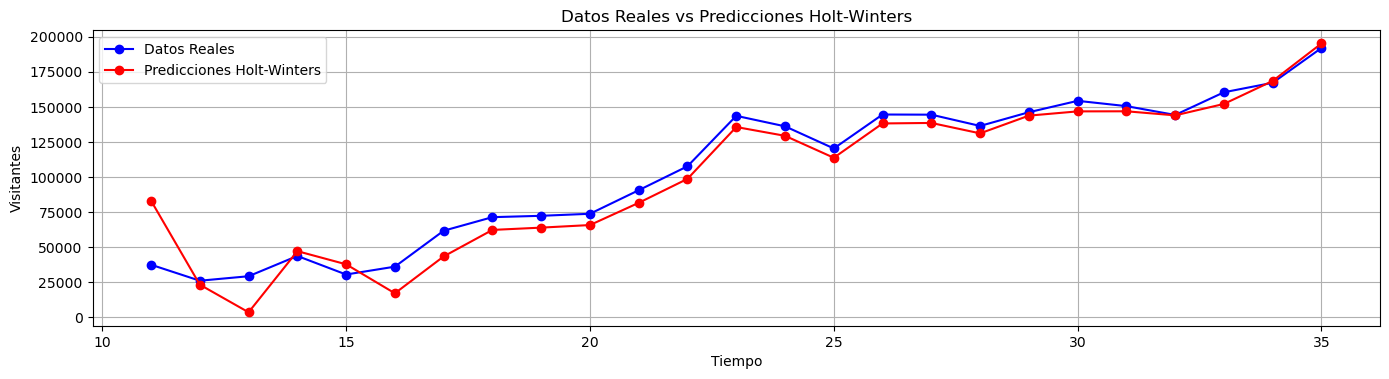

In [39]:
# Holt-Winters
model_hw = ExponentialSmoothing(df['Visitantes'], seasonal='add', seasonal_periods=12).fit()
predictions_hw = model_hw.fittedvalues

# Cálculo de los errores
MAD_hw = mean_absolute_error(df['Visitantes'], predictions_hw)
MAPE_hw = mean_absolute_percentage_error(df['Visitantes'], predictions_hw)*100
errors_hw = df['Visitantes'] - predictions_hw
std_error_hw = 1.25*MAD_hw
# Cálculo de t-Student
df['TSt'] = errors_hw/ MAD_hw
# Calcular el valor máximo y mínimo de t-Student
t_student_max_hw = df['TSt'].max()
t_student_min_hw = df['TSt'].min()

# Resultados
print(f"Holt-Winters - MAD: {round(MAD_hw,2)}, MAPE: {round(MAPE_hw,2)}, Desviación Estándar: {round(std_error_hw,2)}, TST Sup: {round(t_student_max_hw,2)}, TST Min: {round(t_student_min_hw,2)}")

# Visualización

plt.figure(figsize=(14, 7))

# Gráfico de datos reales y predicciones
plt.subplot(2, 1, 1)
plt.plot(df['Visitantes'], label='Datos Reales', color='blue', marker='o')
plt.plot(predictions_hw, label='Predicciones Holt-Winters', color='red', marker='o')
plt.title('Datos Reales vs Predicciones Holt-Winters')
plt.xlabel('Tiempo')
plt.ylabel('Visitantes')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [40]:
# Resumen 

print("ESTIMACIONES DE ERROR DE LOS PRONÓSTICOS\n")

# Crear un DataFrame con las métricas
metrics_dict = {
    'Modelo': ['Promedio Móvil', 'Suavizado Exponencial', 'Holt', 'Holt Winter'],
    'MAD': [round(MAD_ma,2), round(MAD_ses,2),round(MAD_holt,2), round(MAD_hw,2)],
    'MAPE': [round(MAPE_ma,2), round(MAPE_ses,2),round(MAPE_holt,2),round(MAPE_hw,2)],
    'Tst Inf': [round(t_student_min_ma,2), round(t_student_min_ses,2),round(t_student_min_holt,2),round(t_student_min_hw,2)],
    'Tst Sup': [round(t_student_max_ma,2), round(t_student_max_ses,2),round(t_student_max_holt,2), round(t_student_max_hw,2)],
    'STD': [round(std_error_ma,2),round(std_error_ses,2),round(std_error_holt,2), round(std_error_hw,2)]
}

metrics_df = pd.DataFrame(metrics_dict)

# Convertir el DataFrame a formato tabulado
table = tabulate(metrics_df, headers='keys', tablefmt='fancy_grid')

# Mostrar la tabla formateada
print(table)



ESTIMACIONES DE ERROR DE LOS PRONÓSTICOS

╒════╤═══════════════════════╤══════════╤════════╤═══════════╤═══════════╤═════════╕
│    │ Modelo                │      MAD │   MAPE │   Tst Inf │   Tst Sup │     STD │
╞════╪═══════════════════════╪══════════╪════════╪═══════════╪═══════════╪═════════╡
│  0 │ Promedio Móvil        │ 31504.1  │  33.73 │     -0.33 │      2.48 │ 39380.2 │
├────┼───────────────────────┼──────────┼────────┼───────────┼───────────┼─────────┤
│  1 │ Suavizado Exponencial │ 25516.9  │  24.95 │     -0.45 │      2.81 │ 31896.2 │
├────┼───────────────────────┼──────────┼────────┼───────────┼───────────┼─────────┤
│  2 │ Holt                  │ 12366.2  │  15.71 │     -2.36 │      2.5  │ 15457.8 │
├────┼───────────────────────┼──────────┼────────┼───────────┼───────────┼─────────┤
│  3 │ Holt Winter           │  9263.25 │  17.42 │     -4.93 │      2.78 │ 11579.1 │
╘════╧═══════════════════════╧══════════╧════════╧═══════════╧═══════════╧═════════╛


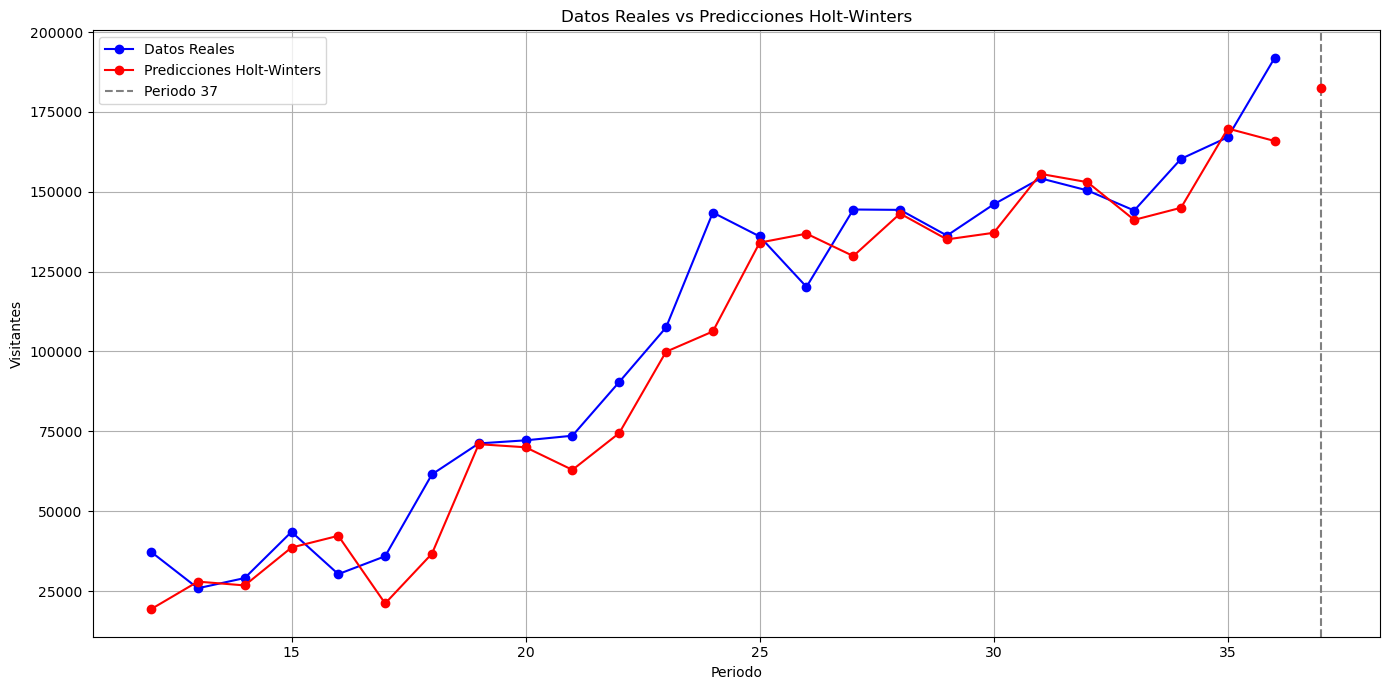

In [42]:

# Holt-Winters
model_hw_full = ExponentialSmoothing(df['Visitantes'], seasonal='add', seasonal_periods=4).fit()
forecast_hw = model_hw_full.forecast(steps=1)
# Graficar Holt-Winters
plt.figure(figsize=(14, 7))
plt.plot(df['Periodo'], df['Visitantes'], label='Datos Reales', color='blue', marker='o')
plt.plot(df['Periodo'], model_hw_full.fittedvalues, label='Predicciones Holt-Winters', color='red', marker='o')
plt.axvline(x=37, color='gray', linestyle='--', label='Periodo 37')
plt.scatter([37], [forecast_hw.iloc[0]], color='red', zorder=5)
plt.title('Datos Reales vs Predicciones Holt-Winters')
plt.xlabel('Periodo')
plt.ylabel('Visitantes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
